In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



In [2]:
data = pd.read_csv('/content/parkinsons2.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 65 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Unnamed: 0                                               131 non-null    object
 1   Demographic information                                  131 non-null    object
 2   Demographic information.1                                131 non-null    object
 3   Clinical information                                     131 non-null    object
 4   Clinical information.1                                   131 non-null    object
 5   Clinical information.2                                   131 non-null    object
 6   Medication                                               131 non-null    object
 7   Medication.1                                             131 non-null    object
 8   Medication.2                            

In [4]:
data.tail(10)

,Unnamed: 0,Demographic information,Demographic information.1,Clinical information,Clinical information.1,Clinical information.2,Medication,Medication.1,Medication.2,Medication.3,...,Speech examination: speaking task of monologue.2,Speech examination: speaking task of monologue.3,Speech examination: speaking task of monologue.4,Speech examination: speaking task of monologue.5,Speech examination: speaking task of monologue.6,Speech examination: speaking task of monologue.7,Speech examination: speaking task of monologue.8,Speech examination: speaking task of monologue.9,Speech examination: speaking task of monologue.10,Speech examination: speaking task of monologue.11
121,HC41,52,M,-,-,-,No,No,No,No,...,-3.25,197,275,44.18,31.37,0.781,-19.87,6,18.08,145
122,HC42,68,M,-,-,-,No,No,No,No,...,-5.38,460,357,41.14,40.37,-1.417,-23.68,4,14.44,522
123,HC43,65,M,-,-,-,No,No,No,No,...,1.32,193,328,50.61,13.37,0.046,-20.7,4.5,19.54,138
124,HC44,54,M,-,-,-,No,No,No,No,...,5.04,184,269,58.73,26.88,-0.385,-19.08,7,15.35,144
125,HC45,46,M,-,-,-,No,No,No,No,...,-1.67,132,241,56.71,22.37,-0.201,-8.86,6,15.75,117
126,HC46,69,M,-,-,-,No,No,No,No,...,8.43,264,380,36.36,26.88,0.023,-23.12,3,15.41,177
127,HC47,68,M,-,-,-,No,No,No,No,...,4.09,177,359,47.06,22.37,-0.117,-18.67,5,16.94,138
128,HC48,53,M,-,-,-,No,No,No,No,...,5.09,223,391,37.74,40.37,0.411,-15.56,3,19.51,156
129,HC49,44,M,-,-,-,No,No,No,No,...,2.8,252,361,38.92,26.88,0.389,-17.53,4,17.51,154
130,HC50,54,M,-,-,-,No,No,No,No,...,0.24,235,319,44.56,26.88,1.137,-27.31,4,14.04,130


In [5]:
data.columns

Index(['Unnamed: 0', 'Demographic information', 'Demographic information.1',
       'Clinical information', 'Clinical information.1',
       'Clinical information.2', 'Medication', 'Medication.1', 'Medication.2',
       'Medication.3', 'Medication.4', 'Medication.5',
       'Overview of motor examination', 'Overview of motor examination.1',
       'UPDRS III motor scale: specific items',
       'UPDRS III motor scale: specific items.1',
       'UPDRS III motor scale: specific items.2',
       'UPDRS III motor scale: specific items.3',
       'UPDRS III motor scale: specific items.4',
       'UPDRS III motor scale: specific items.5',
       'UPDRS III motor scale: specific items.6',
       'UPDRS III motor scale: specific items.7',
       'UPDRS III motor scale: specific items.8',
       'UPDRS III motor scale: specific items.9',
       'UPDRS III motor scale: specific items.10',
       'UPDRS III motor scale: specific items.11',
       'UPDRS III motor scale: specific items.12',
      

In [12]:
data=data.loc[:,['Unnamed: 0', 'Demographic information', 'Demographic information.1',
       'Clinical information', 'Clinical information.1',
       'Clinical information.2', 'Medication', 'Medication.1', 'Medication.2',
       'Medication.3', 'Medication.4', 'Medication.5',
       'Overview of motor examination', 'Overview of motor examination.1',
       'UPDRS III motor scale: specific items',
       'UPDRS III motor scale: specific items.1',
       'UPDRS III motor scale: specific items.2',
       'UPDRS III motor scale: specific items.3',
       'UPDRS III motor scale: specific items.4',
       'UPDRS III motor scale: specific items.5',
       'UPDRS III motor scale: specific items.6',
       'UPDRS III motor scale: specific items.7',
       'UPDRS III motor scale: specific items.8',
       'UPDRS III motor scale: specific items.9',
       'UPDRS III motor scale: specific items.10',
       'UPDRS III motor scale: specific items.11',
       'UPDRS III motor scale: specific items.12',
       'UPDRS III motor scale: specific items.13',
       'UPDRS III motor scale: specific items.14',
       'UPDRS III motor scale: specific items.15',
       'UPDRS III motor scale: specific items.16',
       'UPDRS III motor scale: specific items.17',
       'UPDRS III motor scale: specific items.18',
       'UPDRS III motor scale: specific items.19',
       'UPDRS III motor scale: specific items.20',
       'UPDRS III motor scale: specific items.21',
       'UPDRS III motor scale: specific items.22',
       'UPDRS III motor scale: specific items.23',
       'UPDRS III motor scale: specific items.24',
       'UPDRS III motor scale: specific items.25',
       'UPDRS III motor scale: specific items.26',
       'Speech examination: speaking task of reading passage',
       'Speech examination: speaking task of reading passage.1',
       'Speech examination: speaking task of reading passage.2',
       'Speech examination: speaking task of reading passage.3',
       'Speech examination: speaking task of reading passage.4',
       'Speech examination: speaking task of reading passage.5',
       'Speech examination: speaking task of reading passage.6',
       'Speech examination: speaking task of reading passage.7',
       'Speech examination: speaking task of reading passage.8',
       'Speech examination: speaking task of reading passage.9',
       'Speech examination: speaking task of reading passage.10',
       'Speech examination: speaking task of reading passage.11',
       'Speech examination: speaking task of monologue',
       'Speech examination: speaking task of monologue.1',
       'Speech examination: speaking task of monologue.2',
       'Speech examination: speaking task of monologue.3',
       'Speech examination: speaking task of monologue.4',
       'Speech examination: speaking task of monologue.5',
       'Speech examination: speaking task of monologue.6',
       'Speech examination: speaking task of monologue.7',
       'Speech examination: speaking task of monologue.8',
       'Speech examination: speaking task of monologue.9',
       'Speech examination: speaking task of monologue.10',
       'Speech examination: speaking task of monologue.11',
    ]]


ValueError: ignored

In [9]:
data.isnull().sum()

Unnamed: 0                                           0
Demographic information                              0
Demographic information.1                            0
Clinical information                                 0
Clinical information.1                               0
                                                    ..
Speech examination: speaking task of monologue.7     0
Speech examination: speaking task of monologue.8     0
Speech examination: speaking task of monologue.9     0
Speech examination: speaking task of monologue.10    0
Speech examination: speaking task of monologue.11    0
Length: 65, dtype: int64

In [10]:
# print all the columns of the dataframe
data.columns

Index(['Unnamed: 0', 'Demographic information', 'Demographic information.1',
       'Clinical information', 'Clinical information.1',
       'Clinical information.2', 'Medication', 'Medication.1', 'Medication.2',
       'Medication.3', 'Medication.4', 'Medication.5',
       'Overview of motor examination', 'Overview of motor examination.1',
       'UPDRS III motor scale: specific items',
       'UPDRS III motor scale: specific items.1',
       'UPDRS III motor scale: specific items.2',
       'UPDRS III motor scale: specific items.3',
       'UPDRS III motor scale: specific items.4',
       'UPDRS III motor scale: specific items.5',
       'UPDRS III motor scale: specific items.6',
       'UPDRS III motor scale: specific items.7',
       'UPDRS III motor scale: specific items.8',
       'UPDRS III motor scale: specific items.9',
       'UPDRS III motor scale: specific items.10',
       'UPDRS III motor scale: specific items.11',
       'UPDRS III motor scale: specific items.12',
      

In [11]:
# A1.
# Evaluate the interclass spread between the two classes in the dataset
# using the following features: motor_UPDRS, total_UPDRS, Jitter(%), Shimmer, NHR, HNR, RPDE, DFA, PPE

intraclass_spread = df.groupby('Hoehn_Yahr_Score')['Hoehn_Yahr_Score'].var()

# Calculate interclass distances (ANOVA)
f_statistic, p_value = stats.f_oneway(*[group['Hoehn_Yahr_Score'] for name, group in df.groupby('Hoehn_Yahr_Score')])

# Print intraclass spread
print("Intraclass Spread (Variance):")
print(intraclass_spread)

# Print interclass distances (ANOVA)
print("\nInterclass Distances (ANOVA):")
print("F-statistic:", f_statistic)
print("P-value:", p_value)
In this code:

We create a DataFrame df with Hoehn & Yahr scale scores as an example dataset.

We calculate the intraclass spread using groupby and var to compute the variance within each class (Hoehn & Yahr stage).

We calculate the interclass distances using one-way ANOVA (stats.f_oneway) to test if the means of different stages are significantly different. The F-statistic and p-value are calculated.

This code will print the intraclass spread (variance within each stage) and the results of the ANOVA test for interclass distances, which will help you assess if there are statistically significant differences between the stages. You can modify the data dictionary to use your own dataset if needed.








KeyError: ignored

In [ ]:
# select one feature vector
feature_vector_1 = np.array(data['motor_UPDRS'])
feature_vector_1 = feature_vector_1.reshape(-1, 1)

feature_vector_2 = np.array(data['total_UPDRS'])
feature_vector_2 = feature_vector_2.reshape(-1, 1)


feature_vector_1.mean(axis=0)
feature_vector_2.mean(axis=0)

print('FV-1 >> Mean >> ', feature_vector_1.mean(axis=0))
print('FV-2 >> Mean >> ', feature_vector_2.mean(axis=0))

FV-1 >> Mean >>  [21.29622854]
FV-2 >> Mean >>  [29.01894228]


In [ ]:
centroid_vector_1 = np.mean(feature_vector_1, axis=0)
centroid_vector_2 = np.mean(feature_vector_2, axis=0)

print('FV-1 >> Centroid >> ', centroid_vector_1)
print('FV-2 >> Centroid >> ', centroid_vector_2)

FV-1 >> Centroid >>  [21.29622854]
FV-2 >> Centroid >>  [29.01894228]


In [ ]:
intraclass_spread_1 = np.mean(np.linalg.norm(feature_vector_1 - centroid_vector_1, axis=1))
intraclass_spread_2 = np.mean(np.linalg.norm(feature_vector_2 - centroid_vector_2, axis=1))

print('FV-1 >> Intraclass Spread >> ', intraclass_spread_1)
print('FV-2 >> Intraclass Spread >> ', intraclass_spread_2)

FV-1 >> Intraclass Spread >>  6.959782153792667
FV-2 >> Intraclass Spread >>  8.655948194564056


In [ ]:
interclass_distance = np.linalg.norm(centroid_vector_1 - centroid_vector_2)

print('Interclass Distance:', interclass_distance)

Interclass Distance: 7.72271373617021


Mean >>  21.29622854468085
Variance >>  66.07396954958712


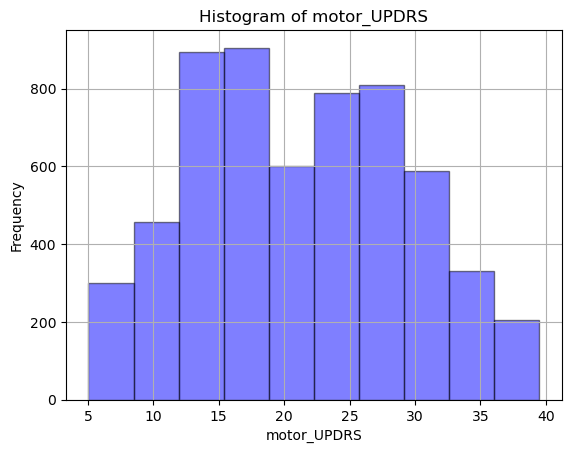

In [ ]:
#A2.

# data

num_bins = 10
hist, bins = np.histogram(data['motor_UPDRS'], bins=num_bins)

mean = np.mean(data['motor_UPDRS'])
variance = np.var(data['motor_UPDRS'])

#plot histogram
plt.hist(data['motor_UPDRS'], bins=num_bins, alpha=0.5, color='blue', edgecolor='black')
plt.xlabel('motor_UPDRS')
plt.ylabel('Frequency')
plt.title('Histogram of motor_UPDRS')
plt.grid(True)


print("Mean >> ", mean)
print("Variance >> ", variance)

plt.show()

In [ ]:
from scipy.spatial import distance

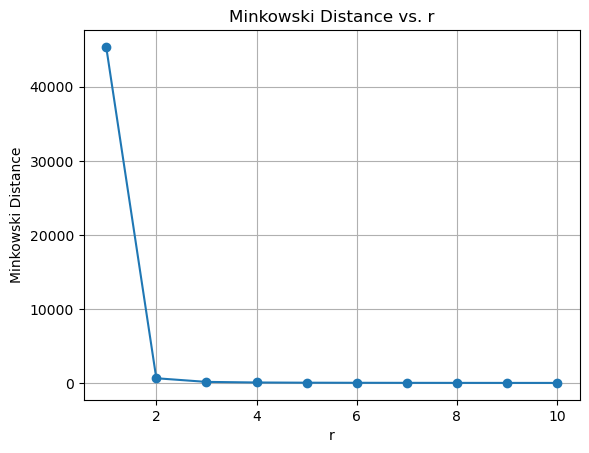

In [ ]:
#A3. Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1
# to 10. Make a plot of the distance and observe the nature of this graph.

vector1 = np.array(data['motor_UPDRS'])
vector2 = np.array(data['total_UPDRS'])

r_values = range(1, 11) # r = 1 to 10

distance = [distance.minkowski(vector1, vector2, p=r) for r in r_values]

plt.plot(r_values, distance, marker='o', linestyle='-')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split



In [ ]:
y.shape

(5875,)